### Abalone Age predict

In [94]:
# 메모리내 변수 제거

all = [var for var in globals() if var[0] != "_"]   # globals() 목록의 첫글자가 _ 로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]

In [95]:
import pathlib

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
dataset = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [20]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [21]:
train_dataset

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1976,0.590,0.455,0.145,1.0730,0.4750,0.1900,0.285,14
1564,0.335,0.260,0.075,0.2200,0.0855,0.0400,0.085,6
1770,0.635,0.480,0.200,1.3655,0.6255,0.2595,0.425,16
988,0.400,0.300,0.110,0.3150,0.1090,0.0670,0.120,9
2506,0.325,0.230,0.090,0.1470,0.0600,0.0340,0.045,4
...,...,...,...,...,...,...,...,...
1181,0.470,0.390,0.150,0.6355,0.2185,0.0885,0.255,9
337,0.500,0.385,0.145,0.7615,0.2460,0.1950,0.204,14
46,0.590,0.405,0.150,0.8530,0.3260,0.2615,0.245,9
747,0.695,0.550,0.220,1.5515,0.5660,0.3835,0.445,13


In [22]:
train_stats = train_dataset.describe()
train_stats.pop("Age")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Length,2656.0,0.521178,0.121185,0.0750,0.450000,0.54000,0.611250,0.7800
Diameter,2656.0,0.405424,0.100079,0.0550,0.345000,0.42000,0.480000,0.6300
Height,2656.0,0.138481,0.038405,0.0000,0.115000,0.14000,0.165000,0.2500
Whole weight,2656.0,0.818729,0.485549,0.0020,0.436375,0.79025,1.145000,2.7795
Shucked weight,2656.0,0.354794,0.219423,0.0010,0.181375,0.33175,0.503625,1.3485
Viscera weight,2656.0,0.178776,0.108975,0.0005,0.092375,0.16925,0.252000,0.7600
Shell weight,2656.0,0.236472,0.139189,0.0015,0.126000,0.22975,0.323000,1.0050


In [23]:
train_labels = train_dataset.pop('Age')
test_labels = test_dataset.pop('Age')

In [24]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [25]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [26]:
model = build_model()

In [36]:
def build_model2():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [37]:
model2 = build_model2()

In [63]:
def build_model3():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [64]:
model3 = build_model3()

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [28]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.04354729],
       [ 0.28944877],
       [ 0.23506303],
       [ 0.2084967 ],
       [ 0.27452594],
       [ 0.24152991],
       [ 0.01350062],
       [ 0.0866003 ],
       [-0.02610239],
       [ 0.12917075]], dtype=float32)

In [29]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.447210,1.154653,2.447210,5.336608,1.663319,5.336608,995
996,2.435320,1.147609,2.435320,5.419536,1.689222,5.419536,996
997,2.422933,1.146075,2.422933,5.129152,1.632408,5.129152,997
998,2.427576,1.144591,2.427576,5.740920,1.775586,5.740920,998
999,2.393270,1.147776,2.393270,5.571465,1.737070,5.571465,999


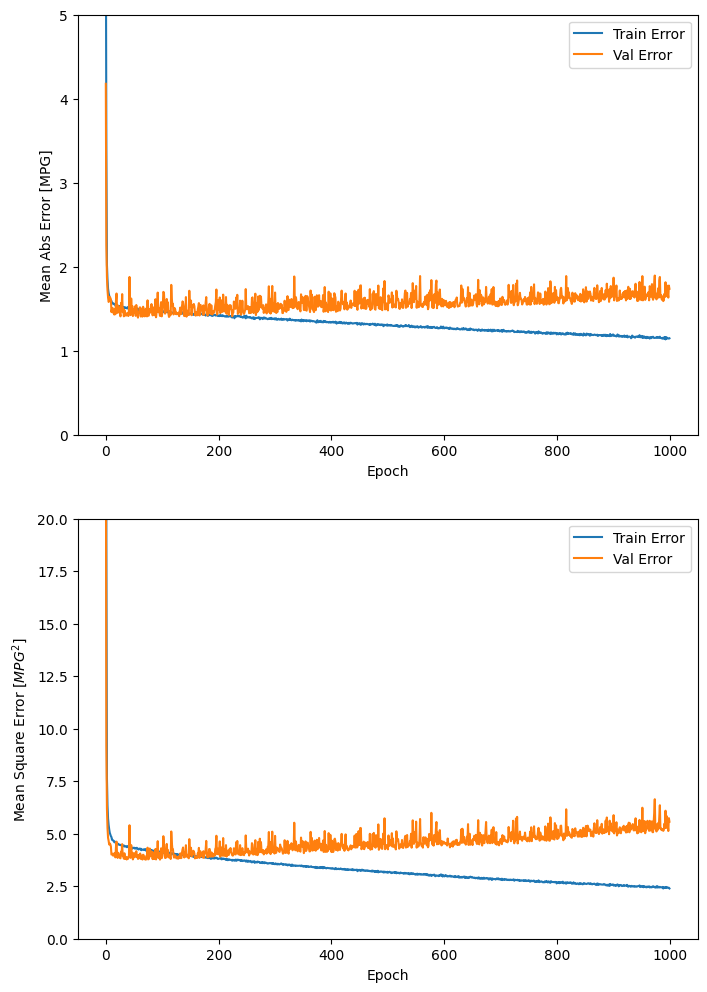

In [31]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


..............................................................................................

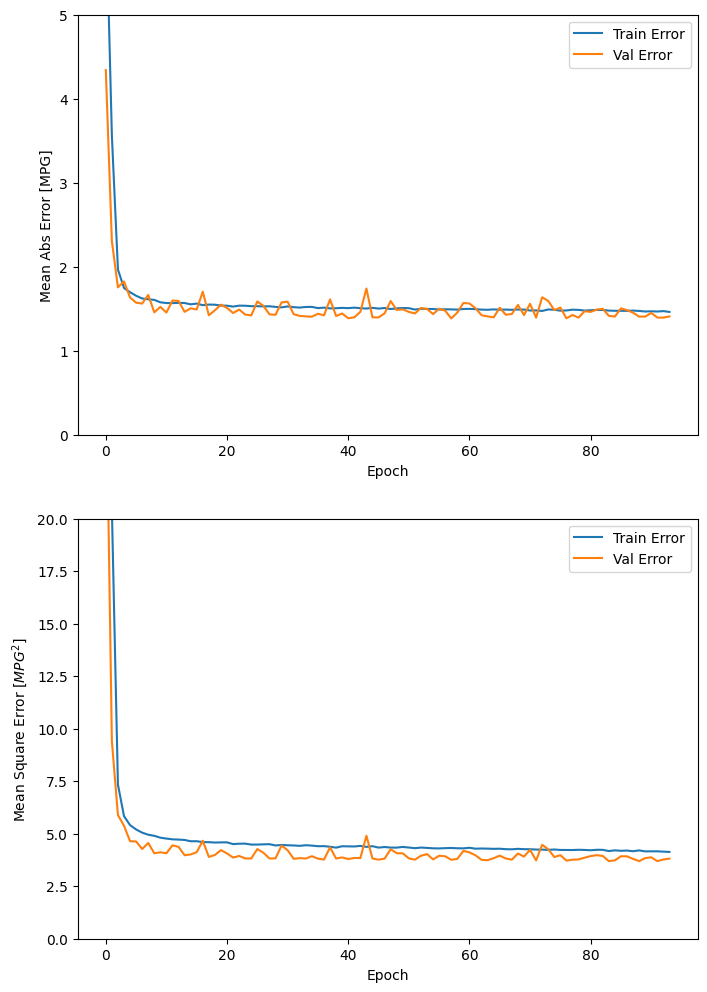

In [32]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [33]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

21/21 - 0s - loss: 5.5541 - mae: 1.5304 - mse: 5.5541 - 36ms/epoch - 2ms/step
테스트 세트의 평균 절대 오차:  1.53 MPG


In [38]:
model2 = build_model2()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model2.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


...............................

In [39]:
loss, mae, mse = model2.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

21/21 - 0s - loss: 4.1425 - mae: 1.4840 - mse: 4.1425 - 31ms/epoch - 1ms/step
테스트 세트의 평균 절대 오차:  1.48 MPG


In [65]:
model3 = build_model3()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model3.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

loss, mae, mse = model3.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))


....................21/21 - 0s - loss: 4.5957 - mae: 1.5200 - mse: 4.5957 - 33ms/epoch - 2ms/step
테스트 세트의 평균 절대 오차:  1.52 MPG


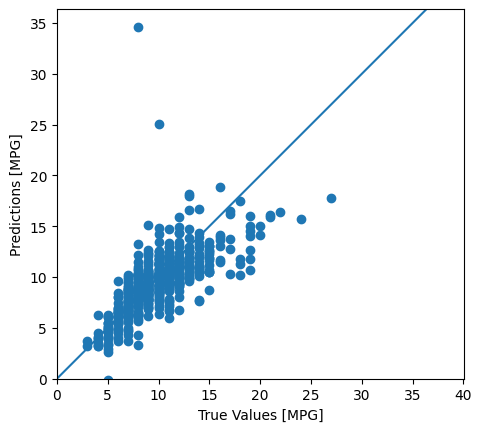

In [34]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

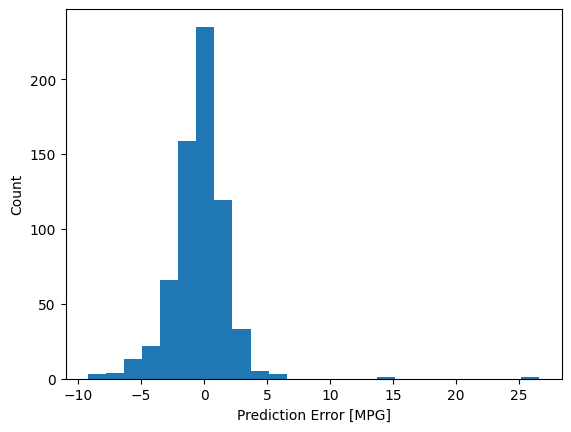

In [35]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

#### Titanic

In [96]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [97]:
titanic.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [98]:
titanic_df = titanic.copy()
# titanic_labels = titanic_df.pop('survived')

In [100]:
titanic_df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [101]:
from sklearn import preprocessing
# 데이터 머신러닝 작업

def encode_features(dataDF):
    features = ['sex', 'class', 'deck', 'embark_town', 'alone']  # 문자지만 계산에 참여 -> 전처리(eda)에서 봤을 때 연관성이 있는 것처럼 보였으므로
    for feature in features:
        le = preprocessing.LabelEncoder()  # 레벨인코더
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,2,7,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,7,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,28.0,0,0,8.4583,2,7,1,1


In [103]:
train_dataset = titanic_df.sample(frac=0.8,random_state=0)
test_dataset = titanic_df.drop(train_dataset.index)

In [106]:
train_stats = train_dataset.describe()
train_stats.pop("survived")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sex,502.0,0.643426,0.479465,0.00,0.0000,1.0000,1.000,1.0000
age,502.0,29.280040,12.095284,0.75,23.0000,28.0000,35.000,80.0000
n_siblings_spouses,502.0,0.531873,1.124034,0.00,0.0000,0.0000,1.000,8.0000
parch,502.0,0.394422,0.804062,0.00,0.0000,0.0000,0.750,5.0000
fare,502.0,35.578344,58.335895,0.00,7.8958,15.0479,31.275,512.3292
class,502.0,1.286853,0.843779,0.00,0.0000,2.0000,2.000,2.0000
deck,502.0,5.906375,2.128881,0.00,7.0000,7.0000,7.000,7.0000
embark_town,502.0,1.501992,0.815883,0.00,1.0000,2.0000,2.000,3.0000
alone,502.0,0.597610,0.490869,0.00,0.0000,1.0000,1.000,1.0000


In [107]:
train_labels = train_dataset.pop('survived')
test_labels = test_dataset.pop('survived')

In [108]:
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

In [110]:
train_dataset.shape

(502, 9)

In [122]:
def titanic_model():
  model = keras.Sequential([
    layers.Dense(64, activation ='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(1, activation = 'softmax')
  ])

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  return model

In [123]:
titanic_model = titanic_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = titanic_model.fit(train_dataset, train_labels, epochs=10,
                            validation_split = 0.2, verbose=0, callbacks=[early_stop])

In [125]:
loss, accuracy = titanic_model.evaluate(test_dataset, test_labels, verbose=2)

print("Servive Accuracy : {:5.2f}".format(accuracy))

4/4 - 0s - loss: 0.5604 - accuracy: 0.3440 - 18ms/epoch - 5ms/step
Servive Accuracy :  0.34
